In [1]:
#initialise general libraries
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import pickle
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
%matplotlib inline

# Allows more columns to be shown for outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5200)

In [2]:
#set directories
dirPData = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/PData/"
dirPOutput = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/"

In [3]:
#import variables
f_name = dirPData + 'ohprepVars.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_test = dict_['df_test']
df_train = dict_['df_train']
OH_df_test = dict_['OH_df_test']
OH_df_train = dict_['OH_df_train']
del f_name, dict_

In [4]:
#prepare X and y
train_y = df_train['target'].values

var_notToUse = ['id']

allFeatures = [var for var in OH_df_train]

train_X = OH_df_train[allFeatures]
test_X = OH_df_test[allFeatures]

In [5]:
from sklearn.model_selection import train_test_split

#prepare validation data
train_Xv, test_Xv, train_yv, test_yv = train_test_split(train_X, train_y, test_size=0.25, random_state=1)

# Penalised (Generalised) Linear Model
## Logistic Regression
### Kaggle Score: 0.86128, Validation Score: 0.8463433118605532
<img src="linlogreg1.png">

In [6]:
from sklearn.linear_model import LogisticRegression
llr_model1v = LogisticRegression(random_state=1, max_iter=2000, solver='lbfgs')
llr_model1v.fit(train_Xv, train_yv)
llrprediction1v = llr_model1v.predict_proba(test_Xv)

In [7]:
print("Validation score:",roc_auc_score(test_yv, llrprediction1v[:,1]))

Validation score: 0.846364363605743


In [8]:
llr_model1 = LogisticRegression(random_state=1, max_iter=2000, solver='lbfgs')
llr_model1.fit(train_X, train_y)
llrprediction1 = llr_model1.predict_proba(test_X)

In [9]:
llrpred1 = {'id': df_test['id'].values,
        'target': llrprediction1[:,1]}
df_llrpred1 = DataFrame(llrpred1)

df_llrpred1 = df_llrpred1.reset_index().set_index('id')
df_llrpred1 = df_llrpred1.drop(columns='index')
df_llrpred1.head()

,target
id,
5,0.090915
10,0.092785
11,0.058006
13,0.131618
16,0.013353


In [10]:
df_llrpred1.to_csv(r'C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/linlogreg1.csv')

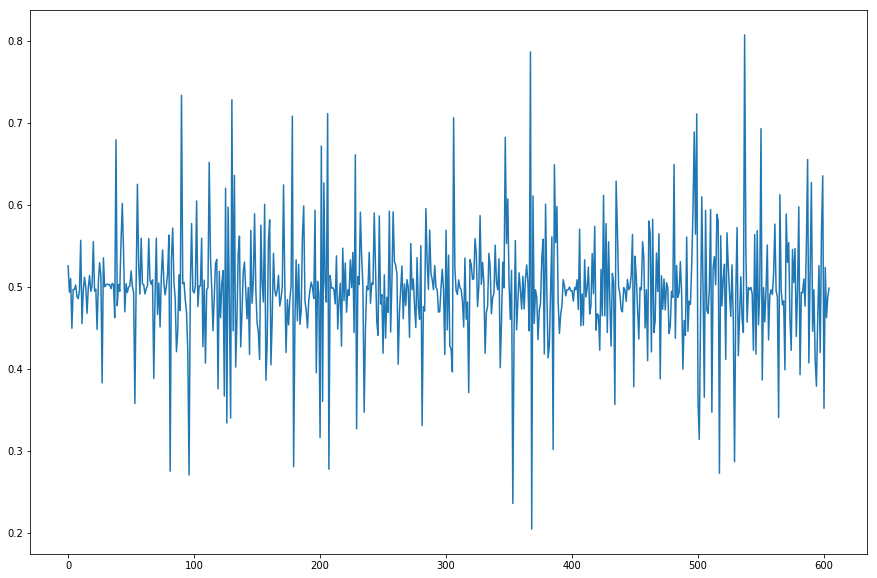

In [11]:
llrcoefs = (np.exp(llr_model1.coef_)/(1+np.exp(llr_model1.coef_)))[0,:]
plt.figure(figsize=(15,10))
plt.plot(llrcoefs)
plt.show()

* Plot of coefficients show that all features have an effect on the target variable, averaging at around 0.5.
* There is a large range of the coefficients with a maximum and minimum of approximately 0.8 and 0.2.
* Features with coefficients below 0.4 could be dropped to improve the model.